<a href="https://colab.research.google.com/github/RawaaBOUALI/FER_SVM_HOG/blob/main/FER_SVM_HOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download data from kaggle

In [19]:
import os

# Configure kaggle
os.chdir('/root/')
!mkdir -p .kaggle
os.chdir('/root/.kaggle')
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Y-o0TVcjehM8SZB3Nt8U3xkyeQu-Nse-' -O kaggle.json > /dev/null 2>&1
!ls /root/.kaggle

# Set permissions 
!chmod 600 /root/.kaggle/kaggle.json

# Create data folder
os.chdir('/content/')
!rm -rf data
!mkdir data
os.chdir('data')
!pwd

# Download data
!pip install -q kaggle
!kaggle datasets download -d msambare/fer2013
# Unzip data
!unzip *.zip 

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training

## Import required libraries and modules

In [20]:
import random 

import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from skimage.feature import hog


from imutils import paths
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score 

## Read the Dataset

In [21]:
imagePaths = list(paths.list_images('../data/train'))

Show samples of the dataset

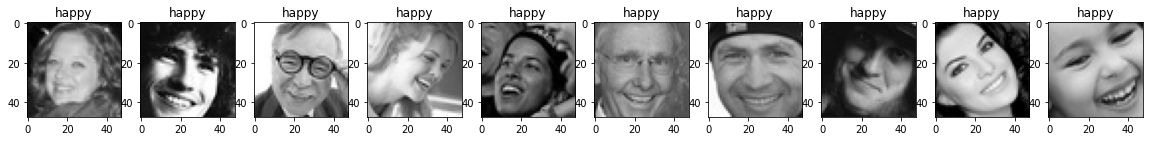

In [22]:
fig = plt.figure(figsize=(20,20))

for i in range(10):

    fig.add_subplot(1, 10, i + 1)
    plt.imshow(np.array(cv2.imread(imagePaths[i])), cmap='gray')
    label = imagePaths[i].split(os.path.sep)[-2]
    plt.title(label)

plt.show()

## Preprocessing and Feature extraction

Read and convert images into gray-scale

In [23]:

def colortogray(im):
    image = cv2.imread(im)
    imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return imgray

Resize images with a fixed size(INTER LINEAR interpolation)

In [24]:
def resizeImage(image, size):
    # cv2.imshow('Resized', cv2.resize(image, (size,size), interpolation=cv2.INTER_CUBIC))
    return cv2.resize(image, (size,size))

Features extraction with HOG algorithm

In [25]:
def feat_lab(imagePaths):

    features = []
    labels = []

    for imagePath in imagePaths:
        im = colortogray(imagePath)
        im = resizeImage(im,64)
        fd1 =  hog(im, orientations=7, pixels_per_cell=(8, 8),cells_per_block=(4, 4),block_norm= 'L2-Hys' ,transform_sqrt = False)

        label = imagePath.split(os.path.sep)[-2]
        labels.append(label)
        features.append(fd1)

    features = np.array(features)
    labels = np.array(labels)
    return features,labels

Compute the features and obtain the lables using the previous functions

In [26]:

features,labels = feat_lab(imagePaths)


print("[INFO] The number of features ..." + str(features.shape[1]))

print("[INFO] The number of samples ..." + str(labels.shape[0]))

[INFO] The number of features ...2800
[INFO] The number of samples ...28709


## Classification

*The classifier*

In [27]:
svm_clf = SVC(kernel='rbf', gamma='scale', C= 10)

### 1.Hold-out accuracy

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = classification_report(y_train, pred)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = classification_report(y_test, pred)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

################################################################################
################################################################################

R =random.randint(1,88)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size= 0.3,random_state=R)

print("[INFO] The number of images used in training ..." + str(X_train.shape[0]))
print("[INFO] The number of images used in testing ..." + str(X_test.shape[0]))


svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

[INFO] The number of images used in training ...20096
[INFO] The number of images used in testing ...8613
Train Result:
Accuracy Score: 99.80%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00      2813
     disgust       1.00      1.00      1.00       300
        fear       1.00      0.99      1.00      2907
       happy       1.00      1.00      1.00      5032
     neutral       1.00      1.00      1.00      3447
         sad       1.00      1.00      1.00      3352
    surprise       1.00      1.00      1.00      2245

    accuracy                           1.00     20096
   macro avg       1.00      1.00      1.00     20096
weighted avg       1.00      1.00      1.00     20096

_______________________________________________
Confusion Matrix: 
 [[2806    0    1    0    2    3    1]
 [   0  300    0    0    0    0    0]
 [   3    1 2891    0    1    5    6]
 [   1 

### 2.Cross-validation accuracy

**3-FOLDS**

In [30]:
cv = KFold(n_splits=3, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(svm_clf, features, labels, scoring='accuracy', cv=cv, n_jobs=-1)
# Report performance

print('SVM MEAN  Accuracy: ',str(np.mean(scores)*100)[:5] + '%')
print('Standard deviation: ',str(np.std(scores)*100)[:5] + '%')

SVM MEAN  Accuracy:  55.30%
Standard deviation:  0.291%


**5-FOLDS**

In [ ]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(svm_clf, features, labels, scoring='accuracy', cv=cv, n_jobs=-1)
# Report performance

print('SVM MEAN  Accuracy: ',str(np.mean(scores)*100)[:5] + '%')
print('Standard deviation: ',str(np.std(scores)*100)[:5] + '%')